In [1]:
# Benchmark for IST unlearned

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def eta(u, T):
    return (u - T)*(u >= T) + (u + T)*(u <= -T)

def onsager(z, r, tau):
    return (z/n) * np.sum(eta(r, tau) != 0)

# Define simulation parameters
n = 250
N = 1024
k = 40
sigma = 0.05
s = 0.2
lambda_ = 0.1
num_iterations = 150

In [2]:
# create A, x, y, w
# Generate matrix A
# SD * random array of size nxN
A = np.sqrt(1/n)*np.random.randn(n, N)

# Track MSE vs iterations
#array of zeros the size of the iterations
mse_vs_iterations_ist = np.zeros(num_iterations)
mse_vs_iterations_amp = np.zeros(num_iterations)

# Generate sparse vector x
x = np.zeros((N, 1))
idx_nonzero_entries = np.random.permutation(N)[0:k]
non_zero_entries = np.random.randint(10, size=(k, 1))+1
x[idx_nonzero_entries] = 1

# Generate noise vector w
# converts it to a column vector. nX1
w = sigma*np.random.randn(n).reshape(-1, 1)

# Generate measurement vector y - note that a @ b is equal to np.matmul(a, b)
y = A @ x + w 

# Prep for IST/AMP
z = np.zeros(y.shape)
xHt = np.zeros(x.shape)

z = [[ 1.37520202e-01 -3.58141549e-01  1.25728678e-01 -1.32548481e-01
   4.15807634e-01  3.88068864e-01 -3.35100621e-01  3.13421934e-01
  -3.18819574e-01 -1.25173074e-02  1.62403859e-01  8.21659519e-01
   7.19236461e-01 -2.82035284e-01 -5.60078919e-02  8.09930143e-02
  -4.07108385e-01  1.41319662e-01 -1.21978434e-01 -5.43684154e-01
   4.48684172e-01  3.06758840e-01  4.77347130e-01 -6.91787125e-02
   4.36541743e-01  5.21502485e-01 -8.48012135e-01 -7.26280685e-01
   3.77730147e-01  5.46405788e-01  4.47078740e-01  1.92940697e-01
   1.68822074e-01 -5.00294259e-01 -3.11512488e-01  3.94584639e-01
   3.25175605e-01  1.83522130e-01  4.09110499e-01  4.72534105e-01
   3.13168518e-02 -3.35955291e-01  3.18108335e-03  3.32410204e-01
   3.90002045e-01  1.17343583e-01  9.49555109e-01  3.56940210e-01
   6.11326942e-01 -4.99572765e-01 -2.13571561e-01  1.66187566e-01
   8.77591253e-02  5.11513746e-02 -7.48808991e-02 -2.00115814e-01
   6.90870971e-01  1.15930086e-01  2.71545738e-01  7.53095413e-02
  -3.2

z = [[ 1.11938474e+37 -4.01839382e+37 -2.40788653e+37  5.15419434e+35
   3.56812735e+36  3.23363998e+37  1.64795767e+37  1.54255457e+37
   1.53569923e+36  8.49890065e+36  3.98854642e+36 -1.65366205e+37
   1.08167630e+37  6.04638378e+36  4.49894031e+37  1.01063005e+36
   4.24916998e+35  2.00782606e+37  4.72332414e+36  3.29641756e+37
   2.06800194e+36 -3.08127148e+37 -1.88210161e+37  1.64660312e+37
  -1.60363523e+37  1.86335396e+37  2.49214064e+37  1.02528779e+37
   8.94296089e+36 -2.98012586e+37  1.15954500e+37 -3.01544088e+36
   8.43745027e+36  1.98732849e+37  3.06024348e+37  2.89806396e+37
  -3.36471474e+37 -3.05439476e+37 -6.23551954e+37 -3.83593044e+37
  -1.29010585e+37 -5.97104312e+36  1.13765973e+37 -3.92277527e+37
  -1.70765615e+37 -9.06775644e+36 -2.23879210e+37 -2.29165786e+37
  -1.91183978e+34 -3.36480239e+36  3.59961637e+36  1.15782587e+37
   3.78550530e+36 -2.99622291e+37 -2.03389980e+37  1.30628422e+37
  -4.56217313e+36 -2.13758345e+37  2.57716428e+36  5.93147114e+35
   4.8

   2.45033417e+73 -3.22281890e+72]]
z = [[ 3.79824272e+73 -2.53809152e+74 -1.45250358e+74  4.89234442e+72
   1.40778275e+73  1.95041313e+74  8.89203515e+73  8.73949275e+73
   7.73883009e+72  7.53956167e+73  4.25362791e+73 -9.69025888e+73
   4.63320191e+73  2.20567569e+73  2.11811301e+74  3.08804972e+73
  -6.64684488e+72  1.12571485e+74  1.52864968e+73  1.45806893e+74
   4.54217970e+73 -1.49266598e+74 -9.01329711e+73  1.08148104e+74
  -7.76331923e+73  1.08825861e+74  1.44133060e+74  4.85582246e+73
   7.49885635e+73 -2.07387049e+74  5.80029219e+73 -3.77368065e+73
   4.68542261e+73  1.17988612e+74  1.98234503e+74  1.64575559e+74
  -1.51013000e+74 -1.65680492e+74 -3.64666053e+74 -1.79660605e+74
  -7.03191242e+73  2.15623521e+73  4.59687540e+73 -2.22528704e+74
  -8.77642290e+73 -2.43484677e+73 -1.21478946e+74 -1.47764978e+74
   9.86806885e+71  5.43167509e+72  9.07605151e+72  7.79905558e+73
   4.31335018e+72 -1.63782023e+74 -1.05385749e+74  4.50334238e+73
  -5.34656850e+72 -1.15824389e+74  3

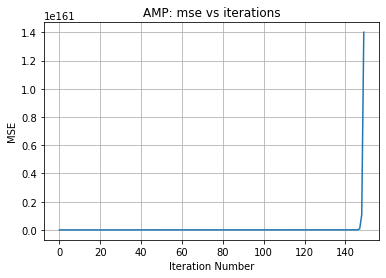

n = 250 | N = 1024 | k = 40


In [6]:
# benchmark AMP
# 150 iterations
# MSE vs iterations
tau = 0
z = np.zeros(y.shape)
xHt = np.zeros(x.shape)
r = 0

for idx_iter in range(num_iterations):
    ons = onsager(z, r, tau)
    z = y - A @ xHt
    tau = np.sqrt((1/n)) * np.linalg.norm(z)
    r = xHt + A.T @ z
    xHt = eta(r, tau)
    print(f'z = {z.T}')
    
# find the current error
    err_sum = np.sum((x - xHt)**2)
    mse_vs_iterations_amp[idx_iter] = (1/N) * err_sum
    
# Plot results
plt.figure()
plt.plot(range(num_iterations), mse_vs_iterations_amp)
plt.xlabel('Iteration Number')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title("AMP: mse vs iterations")
plt.show()
print(f'n = {n} | N = {N} | k = {k}')

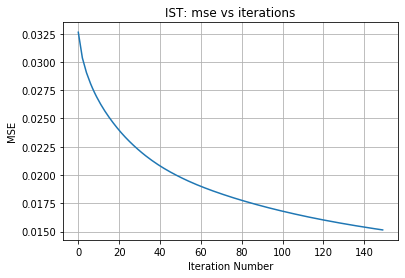

n = 200 | N = 1024 | k = 40


In [42]:
# benchmark IST for n = 205
# 150 iterations
# MSE vs iterations
for idx_iter in range(num_iterations):
    z = y - A @ xHt
    r = xHt + s * A.T @ z
    xHt = eta(r, s*lambda_)
# find the current error
    err_sum = np.sum((x - xHt)**2)
    mse_vs_iterations_ist[idx_iter] = (1/N) * err_sum
    
# Plot results
plt.figure()
plt.plot(range(num_iterations), mse_vs_iterations_ist)
plt.xlabel('Iteration Number')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title("IST: mse vs iterations")
plt.show()
print(f'n = {n} | N = {N} | k = {k}')

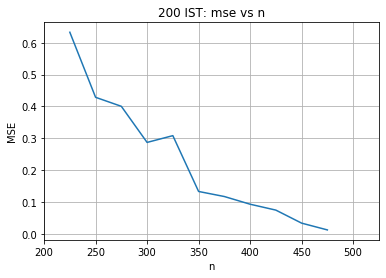

In [38]:
# Prep for IST/AMP
mse_vs_n = np.zeros(11)
n_vec = np.zeros(11)
cnt = 0
#4 MSE vs n calc mse at end of 200 iterations
for loc_n in range(225, 500, 25):
    z = np.zeros(y.shape)
    xHt = np.zeros(x.shape)
    A = np.sqrt(1/loc_n)*np.random.randn(loc_n, N)
    w = sigma*np.random.randn(loc_n).reshape(-1, 1)
    y = A @ x + w     
    for idx_iter in range(num_iterations):
        z = y - A @ xHt
        r = xHt + s * A.T @ z
        xHt = eta(r, s*lambda_)
    mse_vs_n[cnt] = (1/N) * np.sum((x - xHt)**2)
    n_vec[cnt] = loc_n
    cnt += 1

# Plot results
plt.figure()
plt.plot(n_vec, mse_vs_n)
plt.xlabel('n')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title("200 IST: mse vs n")
plt.xlim(200, 525)
plt.show()

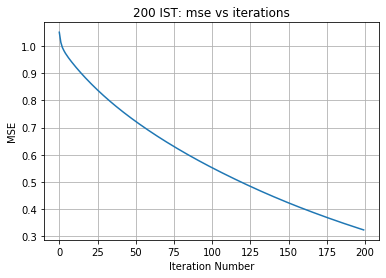

In [10]:
# Run IST
# n = 250, iteration = 200
# MSE vs iterations
for idx_iter in range(num_iterations):
    z = y - A @ xHt
    r = xHt + s * A.T @ z
    xHt = eta(r, s*lambda_)
# find the current error
    err_sum = np.sum((x - xHt)**2)
    mse_vs_iterations[idx_iter] = (1/N) * err_sum
    
# Plot results
plt.figure()
plt.plot(range(num_iterations), mse_vs_iterations)
plt.xlabel('Iteration Number')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title("200 IST: mse vs iterations")
plt.show()

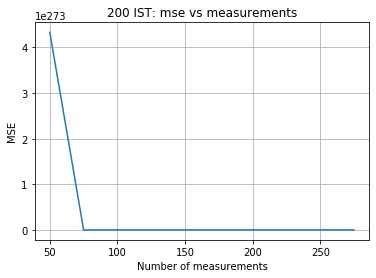

In [18]:
# IST
# MSE vs number of measurements

mse_vs_n = np.zeros(10)
n_vec = np.zeros(10)
cnt = 0

#4 MSE vs n calc mse at end of 200 iterations
for loc_n in range(50, 300, 25):
    z = np.zeros(y.shape)
    xHt = np.zeros(x.shape)
    A = np.sqrt(1/loc_n)*np.random.randn(loc_n, N)
    w = sigma*np.random.randn(loc_n).reshape(-1, 1)
    y = A @ x + w     
    for idx_iter in range(num_iterations):
        z = y - A @ xHt
        r = xHt + s * A.T @ z
        xHt = eta(r, s*lambda_)
    mse_vs_n[cnt] = (1/N) * np.sum((x - xHt)**2)
    n_vec[cnt] = loc_n
    cnt += 1
    
# Plot results
plt.figure()
plt.plot(n_vec, mse_vs_n)
plt.xlabel('Number of measurements')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title("200 IST: mse vs measurements")
plt.show()

[1.57802956e+156 9.99319672e+106 2.63342233e+072 1.93177912e+045
 4.48275039e-001 2.82221833e-001 2.29417434e-001 2.00339697e-001]
[100. 125. 150. 175. 200. 225. 250. 275.]


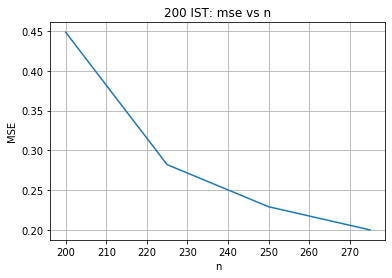

In [26]:
# Prep for IST/AMP
mse_vs_n = np.zeros(8)
n_vec = np.zeros(8)
cnt = 0
#4 MSE vs n calc mse at end of 200 iterations
for loc_n in range(100, 300, 25):
    z = np.zeros(y.shape)
    xHt = np.zeros(x.shape)
    A = np.sqrt(1/loc_n)*np.random.randn(loc_n, N)
    w = sigma*np.random.randn(loc_n).reshape(-1, 1)
    y = A @ x + w     
    for idx_iter in range(num_iterations):
        z = y - A @ xHt
        r = xHt + s * A.T @ z
        xHt = eta(r, s*lambda_)
    mse_vs_n[cnt] = (1/N) * np.sum((x - xHt)**2)
    n_vec[cnt] = loc_n
    cnt += 1

print(mse_vs_n)
print(n_vec)
    
# Plot results
plt.figure()
plt.plot(n_vec[4:], mse_vs_n[4:])
plt.xlabel('n')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title("200 IST: mse vs n")
plt.show()

## n = 200 !!